In [1]:
import warnings
from datetime import timedelta
import numpy as np
import pandas as pd
import xarray as xr

## SAI

In [2]:
dir_sai = '/glade/campaign/cesm/collections/ARISE-SAI-1.5/'

d1 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d2 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.002/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d3 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.003/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d4 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.004/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d5 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.005/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d6 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d7 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.007/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d8 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.008/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d9 = '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.009/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d10= '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.010/atm/proc/tseries/month_1/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'

In [3]:
ensembles = ['001','002','003','004','005','006','007','008','009','010']
ens_files = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

In [4]:
f_psl = '.cam.h0.PSL.203501-20*12.nc'; var_psl = 'PSL'
f_ts = '.cam.h0.TS.203501-20*12.nc'; var_ts = 'TS'
f_prect = '.cam.h0.PRECT.203501-20*12.nc'; var_prect = 'PRECT'

#f_u = '.cam.h0.U.203501-206912.nc'; var_u = 'U'
#f_v = '.cam.h0.V.203501-206912.nc'; var_v = 'V'

In [5]:
# cali jet
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_sai+j+i+f_psl, decode_cf=True)[var_psl]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        # convert cftime to datetime 
        # center the month because the bounds are given first
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(221.25, 238.75), 
        lat=slice(28.75, 38.75)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want DJF
    ds = ds[(ds.time.dt.month==1)|(ds.time.dt.month==2)|(ds.time.dt.month==12)].isel(
        time=slice(2,-1))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-DEC').mean(skipna=True)
    
    # save file
    ds.to_netcdf('/glade/scratch/molina/cali_jet_sai.'+i+'.'+var_psl+'.nc')

/glade/work/molina/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


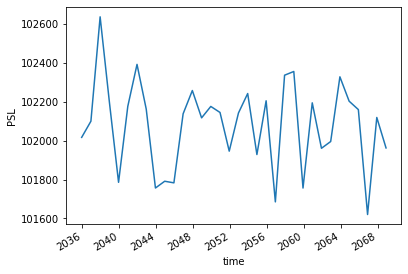

In [6]:
ds.plot() #sample

In [7]:
# enso ts
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_sai+j+i+f_ts, decode_cf=True)[var_ts]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    # nino34 (5N-5S, 170W-120W)
    ds = ds.sel(
        lon=slice(190, 240), 
        lat=slice(-5, 5)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want DJF
    ds = ds[(ds.time.dt.month==1)|(ds.time.dt.month==2)|(ds.time.dt.month==12)].isel(
        time=slice(2,-1))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-DEC').mean(skipna=True)
    
    # save file
    ds.to_netcdf('/glade/scratch/molina/enso_temp_sai.'+i+'.'+var_ts+'.nc')

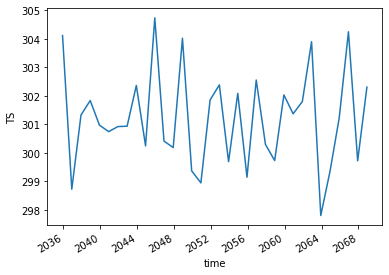

In [8]:
ds.plot() # sample

In [9]:
# cali ts
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_sai+j+i+f_ts, decode_cf=True)[var_ts]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(231.5625, 244.6875), 
        lat=slice(34.28515, 39.99935)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want DJF
    ds = ds[(ds.time.dt.month==1)|(ds.time.dt.month==2)|(ds.time.dt.month==12)].isel(
        time=slice(2,-1))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-DEC').mean(skipna=True)

    # save file
    ds.to_netcdf('/glade/scratch/molina/cali_temp_sai.'+i+'.'+var_ts+'.nc')

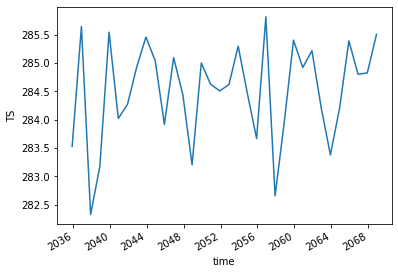

In [10]:
ds.plot() # sample

In [11]:
# cali prect
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_sai+j+i+f_prect, decode_cf=True)[var_prect]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(231.5625, 244.6875), 
        lat=slice(34.28515, 39.99935)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want DJF
    ds = ds[(ds.time.dt.month==1)|(ds.time.dt.month==2)|(ds.time.dt.month==12)].isel(
        time=slice(2,-1))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-DEC').mean(skipna=True)
    
    # save file
    ds.to_netcdf('/glade/scratch/molina/cali_precip_sai.'+i+'.'+var_prect+'.nc')

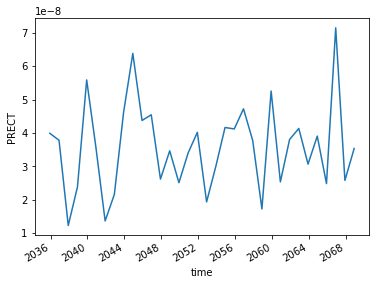

In [12]:
ds.plot() # sample

## SSP2-4.5

In [13]:
dir_ssp = '/glade/campaign/cesm/collections/CESM2-WACCM-SSP245/'

d1 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.001/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d2 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.002/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d3 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.003/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d4 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.004/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d5 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.005/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d6 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d7 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d8 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.008/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d9 = '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.009/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d10= '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.010/atm/proc/tseries/month_1/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'

In [14]:
ensembles = ['001','002','003','004','005','006','007','008','009','010']
ens_files = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

In [15]:
f_psl = '.cam.h0.PSL.*.nc'; var_psl = 'PSL'
f_ts = '.cam.h0.TS.*.nc'; var_ts = 'TS'
f_prect = '.cam.h0.PRECT.*.nc'; var_prect = 'PRECT'

#f_u = '.cam.h0.U.203501-206912.nc'; var_u = 'U'
#f_v = '.cam.h0.V.203501-206912.nc'; var_v = 'V'

In [16]:
# cali jet
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_ssp+j+i+f_psl, decode_cf=True)[var_psl]

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(221.25, 238.75), 
        lat=slice(28.75, 38.75)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want DJF
    ds = ds[(ds.time.dt.month==1)|(ds.time.dt.month==2)|(ds.time.dt.month==12)].isel(
        time=slice(2,-1))

    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-DEC').mean(skipna=True)

    # save file
    ds.to_netcdf('/glade/scratch/molina/cali_jet_ssp.'+i+'.'+var_psl+'.nc')

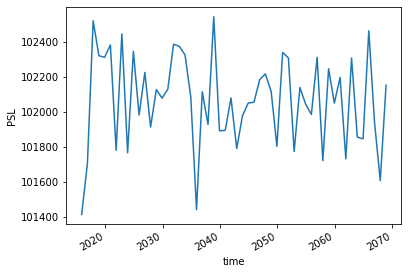

In [17]:
ds.plot() # sample

In [18]:
# cali ts
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_ssp+j+i+f_ts, decode_cf=True)[var_ts]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(231.5625, 244.6875), 
        lat=slice(34.28515, 39.99935)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want DJF
    ds = ds[(ds.time.dt.month==1)|(ds.time.dt.month==2)|(ds.time.dt.month==12)].isel(
        time=slice(2,-1))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-DEC').mean(skipna=True)

    # save file
    ds.to_netcdf('/glade/scratch/molina/cali_temp_ssp.'+i+'.'+var_ts+'.nc')

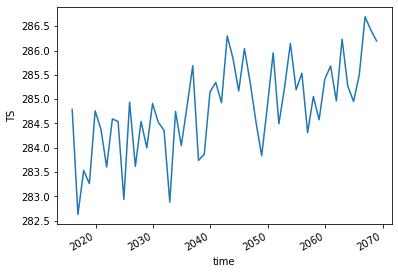

In [19]:
ds.plot() # sample

In [24]:
# enso ts
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_ssp+j+i+f_ts, decode_cf=True)[var_ts]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(190, 240), 
        lat=slice(-5, 5)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want DJF
    ds = ds[(ds.time.dt.month==1)|(ds.time.dt.month==2)|(ds.time.dt.month==12)].isel(
        time=slice(2,-1))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-DEC').mean(skipna=True)
    
    # save file
    ds.to_netcdf('/glade/scratch/molina/enso_temp_ssp.'+i+'.'+var_ts+'.nc')

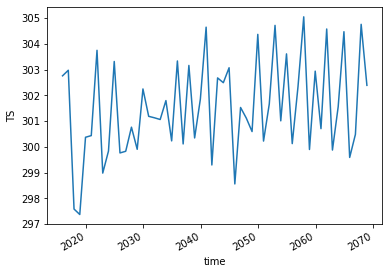

In [25]:
ds.plot() # sample

In [26]:
# cali prect
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_ssp+j+i+f_prect, decode_cf=True)[var_prect]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(231.5625, 244.6875), 
        lat=slice(34.28515, 39.99935)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want DJF
    ds = ds[(ds.time.dt.month==1)|(ds.time.dt.month==2)|(ds.time.dt.month==12)].isel(
        time=slice(2,-1))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-DEC').mean(skipna=True)
    
    # save file
    ds.to_netcdf('/glade/scratch/molina/cali_precip_ssp.'+i+'.'+var_prect+'.nc')

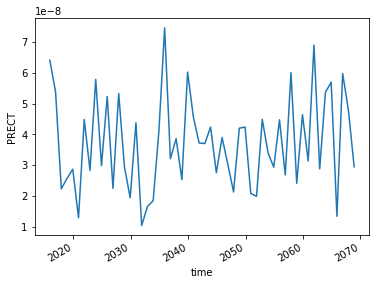

In [27]:
ds.plot() # sample